In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-loan-classification/UniversalBank.csv


In [2]:
all_data = pd.read_csv('/kaggle/input/bank-loan-classification/UniversalBank.csv')
all_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


categorical features that need to be preprocessed:
zipcode, education(ordinal)


target variable:
Personal Loan 


continuous variable:
experiencet

In [3]:
# Examine missing values

all_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values in the data 

In [4]:
all_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Since the minority class is about 1% of the total data, handling 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


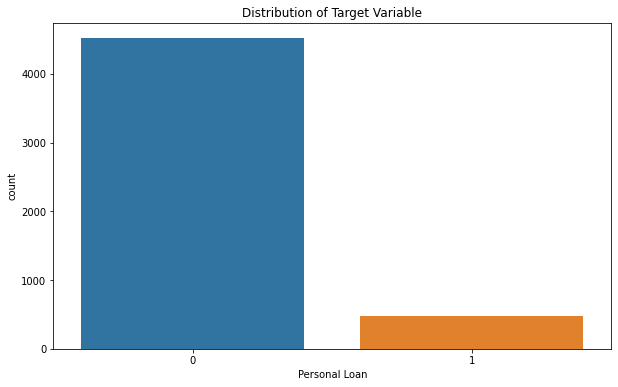

In [5]:
plt.figure(figsize = (10,6))
sns.countplot('Personal Loan',data=all_data).set_title('Distribution of Target Variable')
plt.show()

In [6]:
all_data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [7]:
one_hot_encoded_data = pd.get_dummies(all_data, columns = ['Education','ZIP Code'])
one_hot_encoded_data

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,...,ZIP Code_95973,ZIP Code_96001,ZIP Code_96003,ZIP Code_96008,ZIP Code_96064,ZIP Code_96091,ZIP Code_96094,ZIP Code_96145,ZIP Code_96150,ZIP Code_96651
0,1,25,1,49,4,1.6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,45,19,34,3,1.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,39,15,11,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,1,2.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,35,8,45,4,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4997,30,4,15,4,0.4,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4998,63,39,24,2,0.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
one_hot_encoded_data = one_hot_encoded_data.drop('ID',axis=1)

In [9]:
# X = one_hot_encoded_data.drop('Personal Loan',axis=1)
# scaler = StandardScaler()

# columns = np.array(one_hot_encoded_data.keys())
# scaledX = scaler.fit_transform(X)
# one_hot_encoded_data[columns] = scaledX
# one_hot_encoded_data

In [10]:
scaler = MinMaxScaler()
model=scaler.fit(one_hot_encoded_data)
scaled_data=model.transform(one_hot_encoded_data)

scaled_data = pd.DataFrame(scaled_data, index=one_hot_encoded_data.index, columns=one_hot_encoded_data.columns)


In [11]:
X = scaled_data.drop('Personal Loan',axis=1)
y = scaled_data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 480), (1500, 480), (3500,), (1500,))

In [12]:
mlp_clf = MLPClassifier(hidden_layer_sizes=20,activation = 'logistic',solver = 'adam')

mlp_clf.fit(X_train, y_train.astype('int'))

pred = mlp_clf.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1338   25]
 [  67   70]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1363
         1.0       0.74      0.51      0.60       137

    accuracy                           0.94      1500
   macro avg       0.84      0.75      0.79      1500
weighted avg       0.93      0.94      0.93      1500



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
